<a href="https://colab.research.google.com/github/Subhash-K45/python/blob/main/Turbine/Turbine_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/turbine-preprocessed.zip')

In [ ]:
data.describe()

ActivePower  AmbientTemperatue  BearingShaftTemperature  \
count  65520.000000       65520.000000             65520.000000   
mean     610.169765          28.859707                43.106249   
std      572.714779           4.305047                 4.654038   
min       -8.589952          16.186189                26.274643   
25%      107.991897          25.910422                40.180428   
50%      484.388496          28.859015                43.032237   
75%      951.768863          31.438319                46.355447   
max     1779.032433          42.197266                52.321315   

       Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  \
count      65520.000000      65520.000000      65520.000000   
mean           9.685866         10.025098         10.025098   
std           16.585963         16.197017         16.197017   
min           -1.380998         -0.872639         -0.872639   
25%           -0.445523          0.069231          0.069231   
50%            7.518957         10.026366         10.026366   
75%            9.686173         10.026366         10.026366   
max           88.979220         88.797010         88.797010   

       ControlBoxTemperature  GearboxBearingTemperature  \
count                65520.0               65520.000000   
mean                     0.0                  64.327134   
std                      0.0                   8.993019   
min                      0.0                  40.855610   
25%                      0.0                  58.630731   
50%                      0.0                  64.109257   
75%                      0.0                  69.725072   
max                      0.0                  82.237932   

       GearboxOilTemperature  GeneratorRPM  GeneratorWinding1Temperature  \
count           65520.000000  65520.000000                  65520.000000   
mean               57.642614   1089.928349                     72.074325   
std                 5.555614    493.418123                     21.298738   
min                44.377729      0.000000                     32.109226   
25%                54.254952   1029.903767                     56.460812   
50%                57.494096   1089.919053                     67.958368   
75%                60.403249   1435.032012                     80.837924   
max                71.905823   1893.649687                    122.840580   

       GeneratorWinding2Temperature  HubTemperature  MainBoxTemperature  \
count                  65520.000000    65520.000000        65520.000000   
mean                      71.433801       37.127363           39.777579   
std                       21.310336        4.262376            4.950515   
min                       32.191718        5.654878           26.948700   
25%                       55.743866       34.016111           36.363673   
50%                       67.198292       37.012220           39.690392   
75%                       80.263781       40.003815           43.006507   
max                      122.175441       50.467302           53.159574   

       NacellePosition  ReactivePower      RotorRPM  TurbineStatus  \
count     65520.000000   65520.000000  65520.000000   6.552000e+04   
mean        200.444525     118.880330      9.784054   2.413930e+03   
std          70.519823     117.257110      4.470582   3.513821e+05   
min           0.000000    -203.182591      0.000000   0.000000e+00   
25%         170.800000      18.685559      9.232425   2.000000e+00   
50%         200.408621      94.924518      9.783786   2.000000e+00   
75%         200.614146     187.080103     12.992617   2.000000e+00   
max         357.000000     403.713620     19.807699   6.574653e+07   

       WindDirection     WindSpeed  
count   65520.000000  65520.000000  
mean      200.410013      5.843727  
std        70.861246      2.394875  
min         0.000000      0.900000  
25%       170.800000      4.037966  
50%       200.101360      5.856499  
75%       200.666595      7.264093  
max       357.00

In [ ]:
data.columns

Index(['ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle',
       'ControlBoxTemperature', 'GearboxBearingTemperature',
       'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature',
       'GeneratorWinding2Temperature', 'HubTemperature', 'MainBoxTemperature',
       'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus',
       'WindDirection', 'WindSpeed', 'Date and Time', 'WTG', 'Time', 'Date'],
      dtype='object')

In [ ]:
data.duplicated().sum()

0

Analysing the sudden drop of Active power

In [ ]:
data['ActivePower'] = data['ActivePower'].abs()

In [ ]:
data['Date'] = data['Date'].astype(str)

In [ ]:
df_2019 = data[data['Date'].str.contains('2019')]
df_2020 = data[data['Date'].str.contains('2020')]

In [ ]:
data['Date and Time'].dtype

dtype('O')

In [ ]:
month_data = {}
for month in range(1, 13):
    monthly_data = df_2019[df_2019['Date'].str.contains(f'-{month:02d}')]
    average_active_power = monthly_data['ActivePower'].mean()
    month_data[f'{month:02d}'] = average_active_power


In [ ]:
month_data

{'01': 547.1466926659537,
 '02': 613.1454605058819,
 '03': 532.0599854255505,
 '04': 451.0668443065931,
 '05': 594.9781868327873,
 '06': 861.554554493349,
 '07': 1089.0532080042997,
 '08': 1051.9491879240657,
 '09': 731.809920865982,
 '10': 461.6805643365842,
 '11': 405.5554005034346,
 '12': 509.9526137841814}

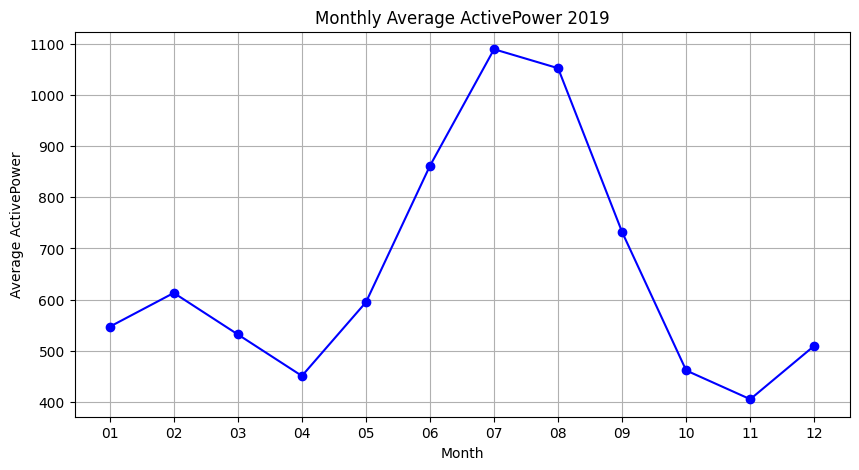

In [ ]:
months = list(month_data.keys())
averages = list(month_data.values())

# Plotting the line plot
plt.figure(figsize=(10, 5))
plt.plot(months, averages, marker='o', linestyle='-', color='b')
plt.title('Monthly Average ActivePower 2019')
plt.xlabel('Month')
plt.ylabel('Average ActivePower')
plt.grid(True)
plt.show()

In [ ]:
month_data = {}
for month in range(1, 13):
    monthly_data = df_2020[df_2020['Date'].str.contains(f'-{month:02d}')]
    average_active_power = monthly_data['ActivePower'].mean()
    month_data[f'{month:02d}'] = average_active_power

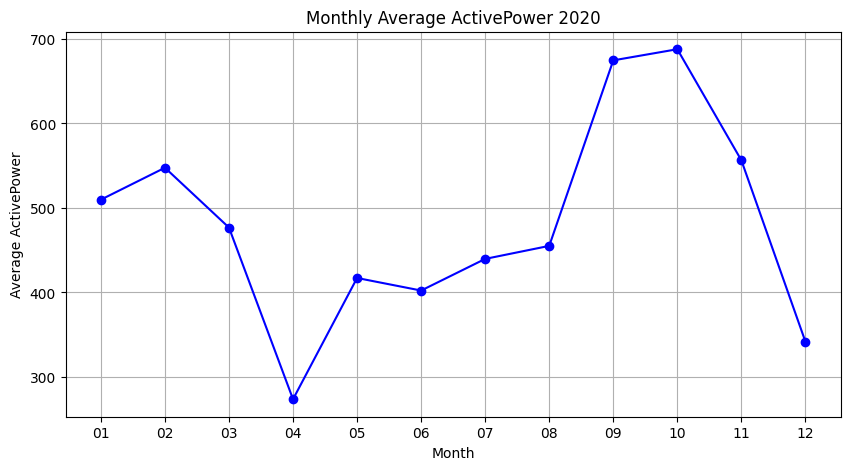

In [ ]:
months = list(month_data.keys())
averages = list(month_data.values())

# Plotting the line plot
plt.figure(figsize=(10, 5))
plt.plot(months, averages, marker='o', linestyle='-', color='b')
plt.title('Monthly Average ActivePower 2020')
plt.xlabel('Month')
plt.ylabel('Average ActivePower')
plt.grid(True)
plt.show()

In [ ]:
month_data = {}
for month in range(1, 13):
    monthly_data = df_2019[df_2019['Date'].str.contains(f'-{month:02d}')]
    average_active_power = monthly_data['ActivePower'].sum()
    month_data[f'{month:02d}'] = average_active_power

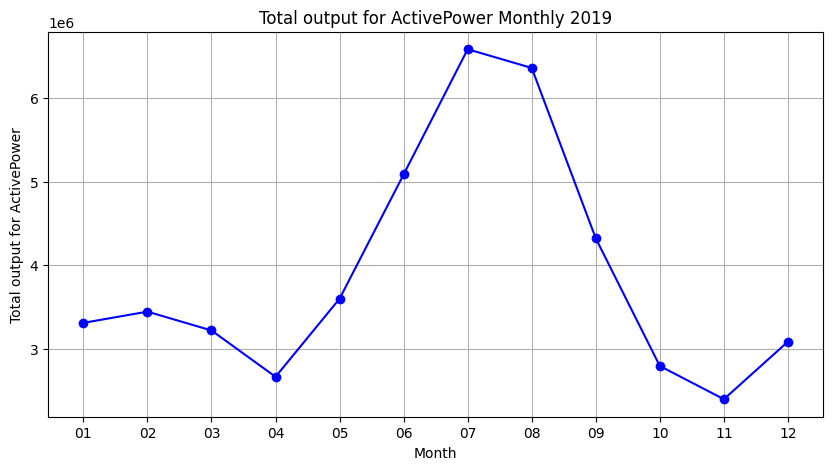

In [ ]:
months = list(month_data.keys())
total_output = list(month_data.values())

# Plotting the line plot
plt.figure(figsize=(10, 5))
plt.plot(months, total_output, marker='o', linestyle='-', color='b')
plt.title('Total output for ActivePower Monthly 2019')
plt.xlabel('Month')
plt.ylabel('Total output for ActivePower')
plt.grid(True)
plt.show()

In [ ]:
month_data = {}
for month in range(1, 13):
    monthly_data = df_2020[df_2020['Date'].str.contains(f'-{month:02d}')]
    average_active_power = monthly_data['ActivePower'].sum()
    month_data[f'{month:02d}'] = average_active_power

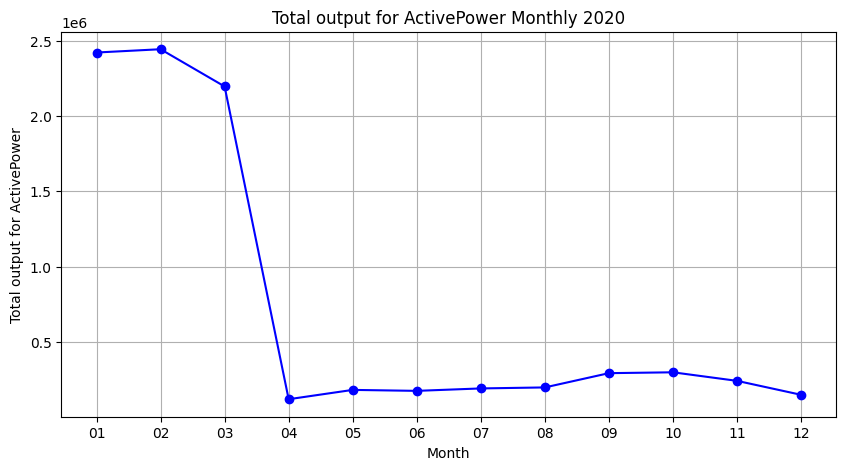

In [ ]:
months = list(month_data.keys())
total_output = list(month_data.values())

# Plotting the line plot
plt.figure(figsize=(10, 5))
plt.plot(months, total_output, marker='o', linestyle='-', color='b')
plt.title('Total output for ActivePower Monthly 2020')
plt.xlabel('Month')
plt.ylabel('Total output for ActivePower')
plt.grid(True)
plt.show()

In [ ]:
month_data_power = {}
for month in range(1, 13):
    monthly_data = df_2019[df_2019['Date'].str.contains(f'2019-{month:02d}')]
    average_active_power = monthly_data['ActivePower'].mean()
    month_data_power[f'{month:02d}-2019'] = average_active_power

In [ ]:
for month in range(1, 4):
    monthly_data = df_2020[df_2020['Date'].str.contains(f'2020-{month:02d}')]
    average_active_power = monthly_data['ActivePower'].mean()
    print(average_active_power,month_data_power)
    month_data_power[f'{month:02d}-2020'] = average_active_power


506.0671228657562 {'01-2019': 489.4935735036709, '02-2019': 515.1184814795375, '03-2019': 437.7776854536113, '04-2019': 327.8344017139043, '05-2019': 569.1877745975538, '06-2019': 923.564530772406, '07-2019': 1259.91996934026, '08-2019': 1244.5145215780701, '09-2019': 768.7912383848798, '10-2019': 381.36775591770197, '11-2019': 277.8135980994286, '12-2019': 414.6670456177792}
561.215642679377 {'01-2019': 489.4935735036709, '02-2019': 515.1184814795375, '03-2019': 437.7776854536113, '04-2019': 327.8344017139043, '05-2019': 569.1877745975538, '06-2019': 923.564530772406, '07-2019': 1259.91996934026, '08-2019': 1244.5145215780701, '09-2019': 768.7912383848798, '10-2019': 381.36775591770197, '11-2019': 277.8135980994286, '12-2019': 414.6670456177792, '01-2020': 506.0671228657562}
474.4342188652495 {'01-2019': 489.4935735036709, '02-2019': 515.1184814795375, '03-2019': 437.7776854536113, '04-2019': 327.8344017139043, '05-2019': 569.1877745975538, '06-2019': 923.564530772406, '07-2019': 1259

In [ ]:
month_data_power

{'01-2019': 489.4935735036709,
 '02-2019': 515.1184814795375,
 '03-2019': 437.7776854536113,
 '04-2019': 327.8344017139043,
 '05-2019': 569.1877745975538,
 '06-2019': 923.564530772406,
 '07-2019': 1259.91996934026,
 '08-2019': 1244.5145215780701,
 '09-2019': 768.7912383848798,
 '10-2019': 381.36775591770197,
 '11-2019': 277.8135980994286,
 '12-2019': 414.6670456177792,
 '01-2020': 506.0671228657562,
 '02-2020': 561.215642679377,
 '03-2020': 474.4342188652495}

<Axes: title={'center': 'Avg Wind Speed vs Avg output Produced'}>

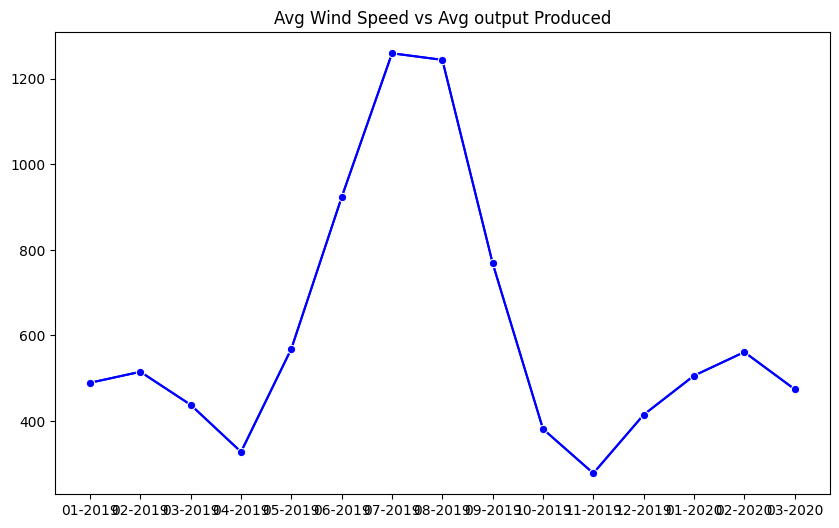

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Avg Wind Speed vs Avg output Produced')
sns.lineplot(x=list(month_data_power.keys()),y=list(month_data_power.values()),marker='o',linestyle='-',color='b')
sns.lineplot(x=list(month_data_power.keys()),y=list(month_data_power.values()),marker='o',linestyle='-',color='b')


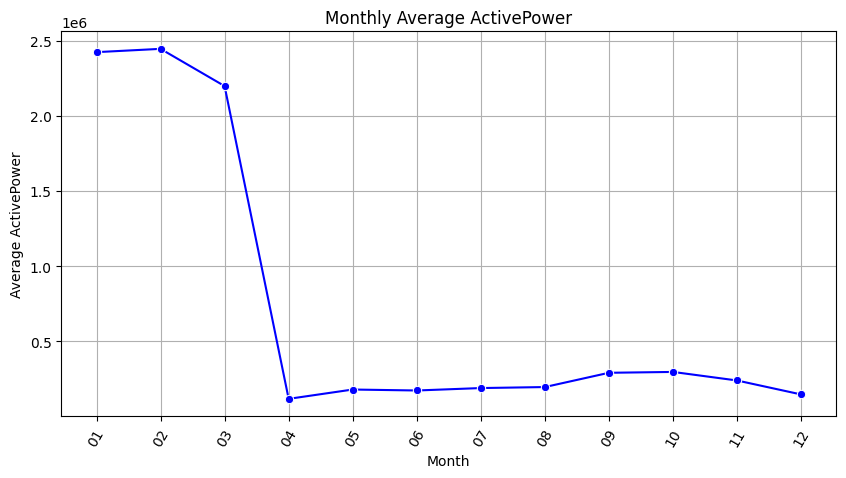

In [ ]:
months = list(month_data.keys())
total_output = list(month_data.values())
df_monthly_averages = pd.DataFrame({'Month': months, 'Average ActivePower': total_output})
# Plotting the line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_monthly_averages, x='Month', y='Average ActivePower', marker='o', linestyle='-', color='b')
plt.title('Monthly Average ActivePower')
plt.xlabel('Month')
plt.xticks(rotation=60)
plt.ylabel('Average ActivePower')
plt.grid(True)
plt.show()

Analysing the speed of the wind

In [ ]:
month_data = {}
for month in range(1, 13):
    monthly_data = df_2019[df_2019['Date'].str.contains(f'2019-{month:02d}')]
    average_active_power = monthly_data['WindSpeed'].mean()
    month_data[f'{month:02d}-2019'] = average_active_power

In [ ]:
for month in range(1, 4):
    monthly_data = df_2020[df_2020['Date'].str.contains(f'2020-{month:02d}')]
    average_active_power = monthly_data['WindSpeed'].mean()
    month_data[f'{month:02d}-2020'] = average_active_power

In [ ]:
list(np.array(list(month_data_power.values()))/100), list(month_data.values())

([4.894935735036709,
  5.151184814795375,
  4.377776854536113,
  3.2783440171390428,
  5.691877745975538,
  9.23564530772406,
  12.5991996934026,
  12.445145215780702,
  7.687912383848798,
  3.8136775591770196,
  2.778135980994286,
  4.146670456177792,
  5.0606712286575615,
  5.61215642679377,
  4.744342188652495],
 [5.495091943546853,
  5.404293620173663,
  5.095825144794827,
  4.60633229479134,
  5.520656092215682,
  7.018833348757328,
  8.53349958296813,
  8.51168865475439,
  6.3975826155603865,
  4.857467733203654,
  4.552465292749737,
  5.334412346983292,
  5.4079749110811886,
  5.669332856451301,
  5.148446819833825])

In [ ]:
month_data_power

{'01-2019': 489.4935735036709,
 '02-2019': 515.1184814795375,
 '03-2019': 437.7776854536113,
 '04-2019': 327.8344017139043,
 '05-2019': 569.1877745975538,
 '06-2019': 923.564530772406,
 '07-2019': 1259.91996934026,
 '08-2019': 1244.5145215780701,
 '09-2019': 768.7912383848798,
 '10-2019': 381.36775591770197,
 '11-2019': 277.8135980994286,
 '12-2019': 414.6670456177792,
 '01-2020': 506.0671228657562,
 '02-2020': 561.215642679377,
 '03-2020': 474.4342188652495}

In [ ]:
month_mapping = {'01': 'Jan-', '02': 'Feb-', '03': 'Mar-', '04': 'Apr-',
                 '05': 'May-', '06': 'Jun-', '07': 'Jul-', '08': 'Aug-',
                 '09': 'Sep-', '10': 'Oct-', '11': 'Nov-', '12': 'Dec-'}

month_data = {month_mapping[key.split('-')[0]] + key.split('-')[1]: value for key, value in month_data.items()}
month_data_power = {month_mapping[key.split('-')[0]] + key.split('-')[1]: value for key, value in month_data_power.items()}


Q1: Are there any patterns of sudden drops in power output, especially following high winds?

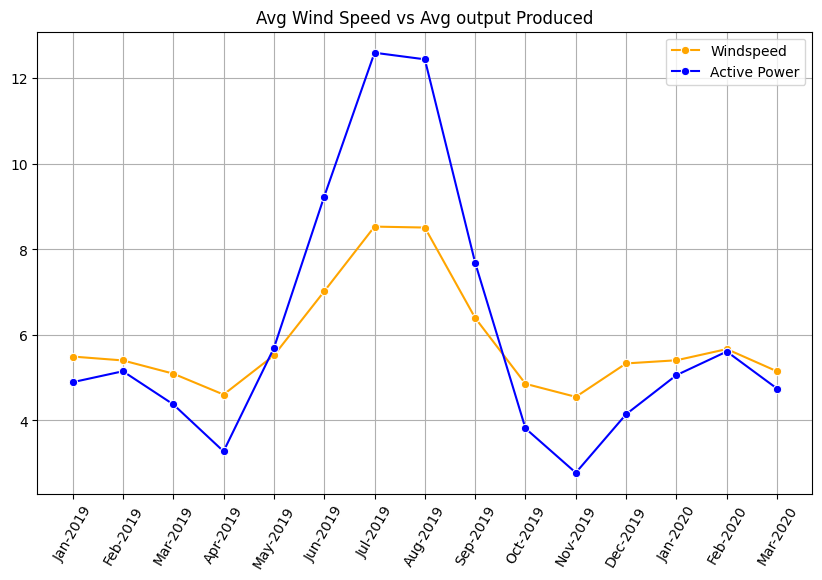

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Avg Wind Speed vs Avg output Produced')
plt.grid(True)

# Assuming month_data and month_data_power are dictionaries
sns.lineplot(x=list(month_data.keys()), y=list(month_data.values()), marker='o', linestyle='-', color='orange', label='Windspeed')
sns.lineplot(x=list(month_data_power.keys()), y=list(np.array(list(month_data_power.values()))/100), marker='o', linestyle='-', color='blue', label='Active Power')
plt.xticks(rotation=60)
plt.legend()
plt.show()

Analyzing the months Sept,Oct,Nov for any power loss

In [ ]:
data_analyze = df_2019[(df_2019['Date'].str.contains(f'2019-09')) |
 (df_2019['Date'].str.contains(f'2019-10')) |
 (df_2019['Date'].str.contains(f'2019-11'))
 ]


In [ ]:
dict_data ={}
for i in range(8,12):
    sum_pow = df_2019[(df_2019['Date'].str.contains(f'2019-{i:02d}'))]['ActivePower'].sum()
    dict_data[f'2019-{i:02d}'] = sum_pow
dict_data

{'2019-08': 5555512.824324505,
 '2019-09': 3321178.1498226807,
 '2019-10': 1702425.6624166216,
 '2019-11': 1200154.7437895315}

In [ ]:
month_mapping = {8:'Aug',9: 'Sep', 10: 'Oct', 11: 'Nov'}
dict_data = {f'{month_mapping[int(key.split("-")[1])]} {key.split("-")[0]}': value for key, value in dict_data.items()}
print(dict_data)

{'Aug 2019': 5555512.824324505, 'Sep 2019': 3321178.1498226807, 'Oct 2019': 1702425.6624166216, 'Nov 2019': 1200154.7437895315}


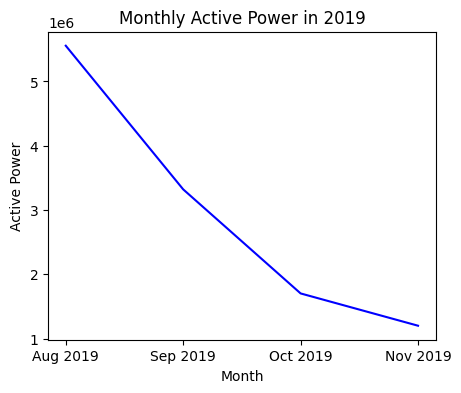

In [ ]:
plt.figure(figsize=(5, 4))
plt.title('Monthly Active Power in 2019')
plt.xlabel('Month')
plt.ylabel('Active Power')
sns.lineplot(x=list(dict_data.keys()), y=list(dict_data.values()), color='b')
plt.show()

sudden drops in power output, especially following high winds. This could indicate blade damage affecting performance.

Analsying with the high wind speed, if Wind speed is high and the active power produced is low then corrision occurs

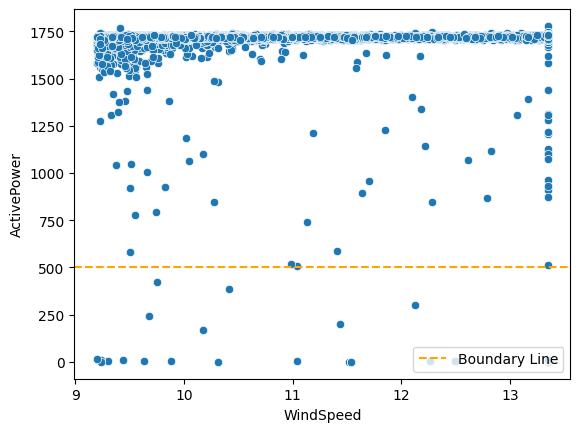

In [ ]:
sns.scatterplot(data=data[(data['WindSpeed']>=9.2) & (data['WindSpeed']<=13.35)],x='WindSpeed',y='ActivePower')
plt.axhline(y=500, color='orange', linestyle='--', label='Boundary Line')
plt.legend(loc='lower right')
plt.show()

In [ ]:
data[(data['WindSpeed'] >= 9.2) & (data['WindSpeed'] <= 13.35) & (data['ActivePower'] < 500)][['Date','ActivePower','WindSpeed']]

Date  ActivePower  WindSpeed
14479  2019-04-11   199.818768  11.432479
16066  2019-04-22     7.821398  13.331840
16067  2019-04-22     4.197269   9.302876
16074  2019-04-22     0.000000  11.524215
16076  2019-04-22     0.000000  10.312200
16079  2019-04-22     4.226592  12.499838
16080  2019-04-22     4.441544  11.043820
16081  2019-04-22     4.453775  12.268563
21682  2019-05-31     5.952544   9.633495
21969  2019-06-02     8.435067   9.233494
22152  2019-06-03     0.009316   9.237499
23807  2019-06-15     7.894596   9.438305
25998  2019-06-30     0.000211  13.349905
26000  2019-06-30   423.278662   9.751404
26968  2019-07-07   384.087066  10.419919
30290  2019-07-30   241.777474   9.683642
30303  2019-07-30     6.019810   9.885850
31330  2019-08-06   303.639161  12.126539
31436  2019-08-07     7.552673  13.349905
31580  2019-08-08     8.589923  13.349905
37116  2019-09-15     0.000000  11.539800
37136  2019-09-15     0.000000  11.539800
37165  2019-09-16     0.000000  11.539800
39656  2019-10-03    17.659300   9.203770
64019  2020-03-20   169.872030  10.172570

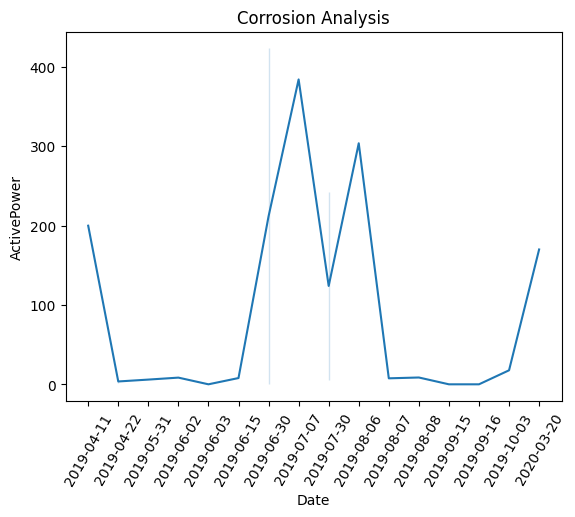

In [ ]:
sns.lineplot(data=data[(data['WindSpeed'] >= 9.2) & (data['WindSpeed'] <= 13.35) & (data['ActivePower'] < 500)],
             x='Date', y='ActivePower')
plt.title('Corrosion Analysis')
plt.xlabel('Date')
plt.ylabel('ActivePower')
plt.xticks(rotation=60)
plt.show()

In [ ]:
# Analysing the factor contribution to this drop of power production
df_power = data[(data['WindSpeed'] >= 9.2) & (data['WindSpeed'] <= 13.35) & (data['ActivePower'] < 500)]

In [ ]:
df_power.columns

Index(['ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle',
       'ControlBoxTemperature', 'GearboxBearingTemperature',
       'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature',
       'GeneratorWinding2Temperature', 'HubTemperature', 'MainBoxTemperature',
       'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus',
       'WindDirection', 'WindSpeed', 'Date and Time', 'WTG', 'Time', 'Date'],
      dtype='object')

In [ ]:
df_power.drop(['ControlBoxTemperature'],axis=1,inplace=True)

<Axes: >

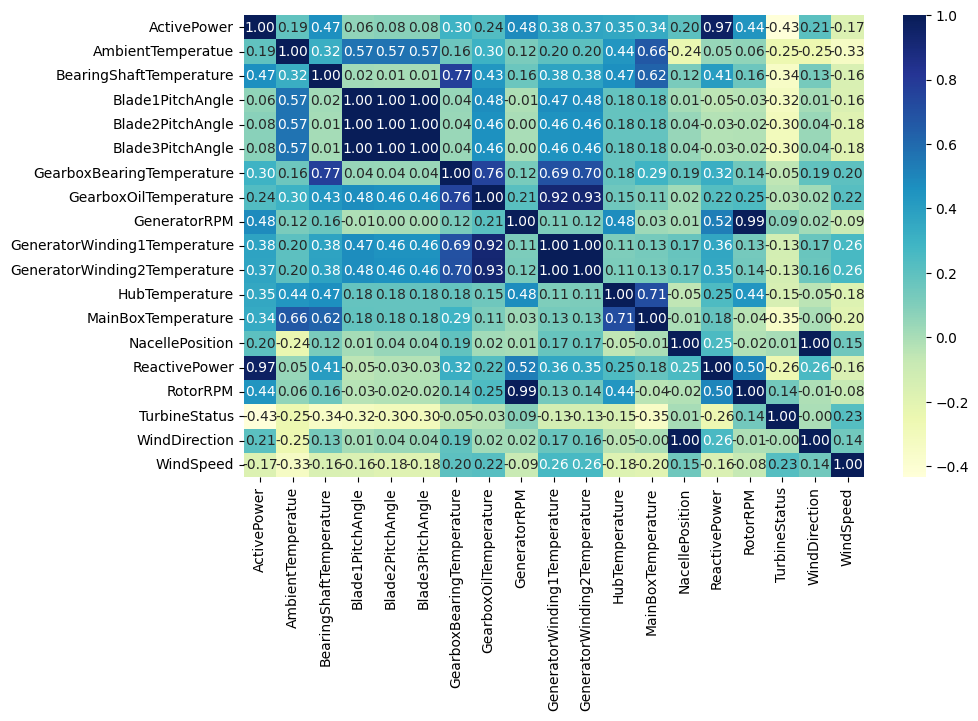

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data = df_power.corr(),annot=True,fmt='.2f',cmap='YlGnBu')

Analysing the reactive power with active power

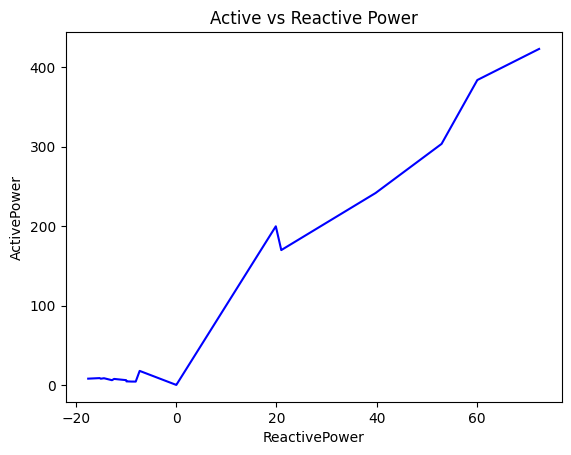

In [ ]:
sns.lineplot(data = df_power,x='ReactivePower',y='ActivePower',color='b')
plt.title('Active vs Reactive Power')
plt.show()

In [ ]:
df_ne = data[data['ActivePower']!=data['ReactivePower']]

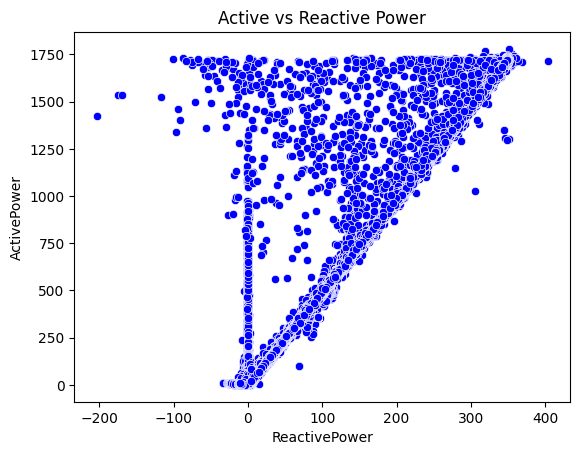

In [ ]:
sns.scatterplot(data = df_ne,x='ReactivePower',y='ActivePower',color='b')
plt.title('Active vs Reactive Power')
plt.show()

Active Power vs Generator RPM

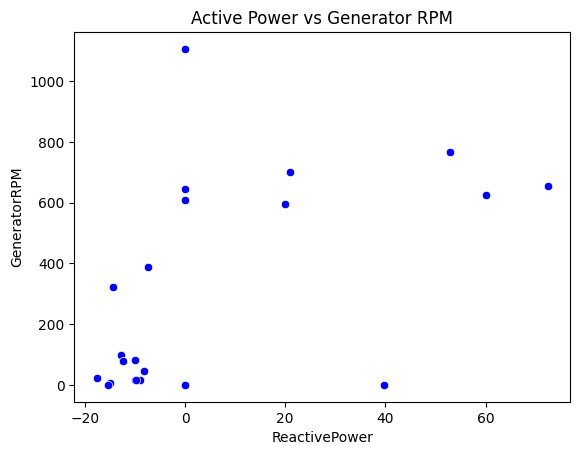

In [ ]:
sns.scatterplot(data = df_power,x='ReactivePower',y='GeneratorRPM',color='b')
plt.title('Active Power vs Generator RPM')
plt.show()

Active Power vs Rotor RPM

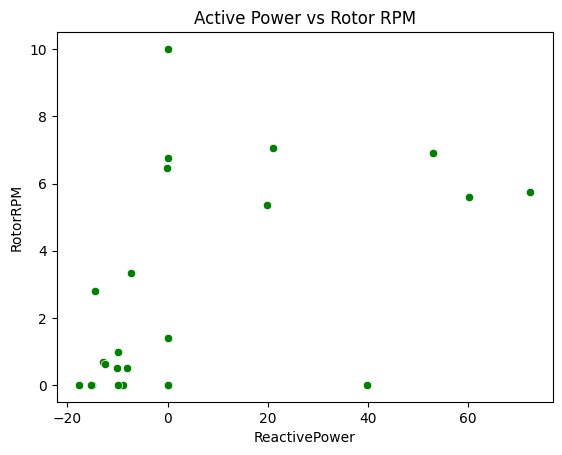

In [ ]:
sns.scatterplot(data = df_power,x='ReactivePower',y='RotorRPM',color='green')
plt.title('Active Power vs Rotor RPM')
plt.show()

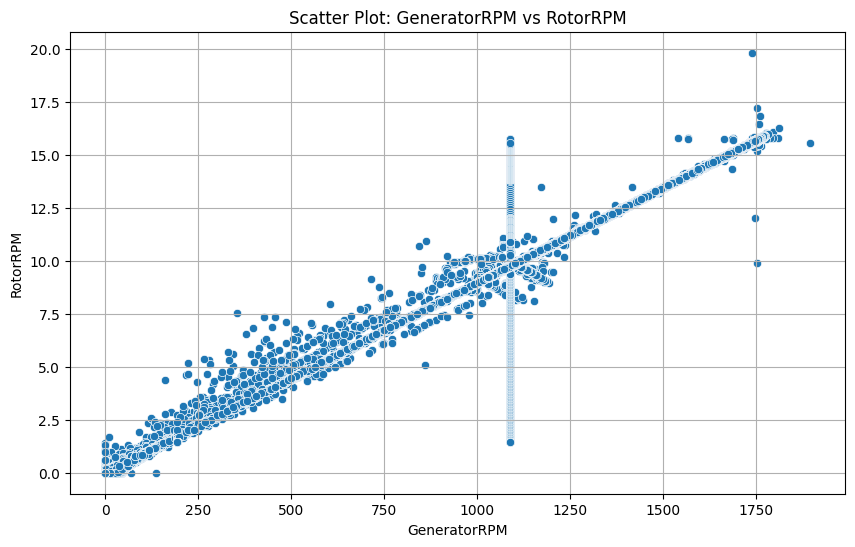

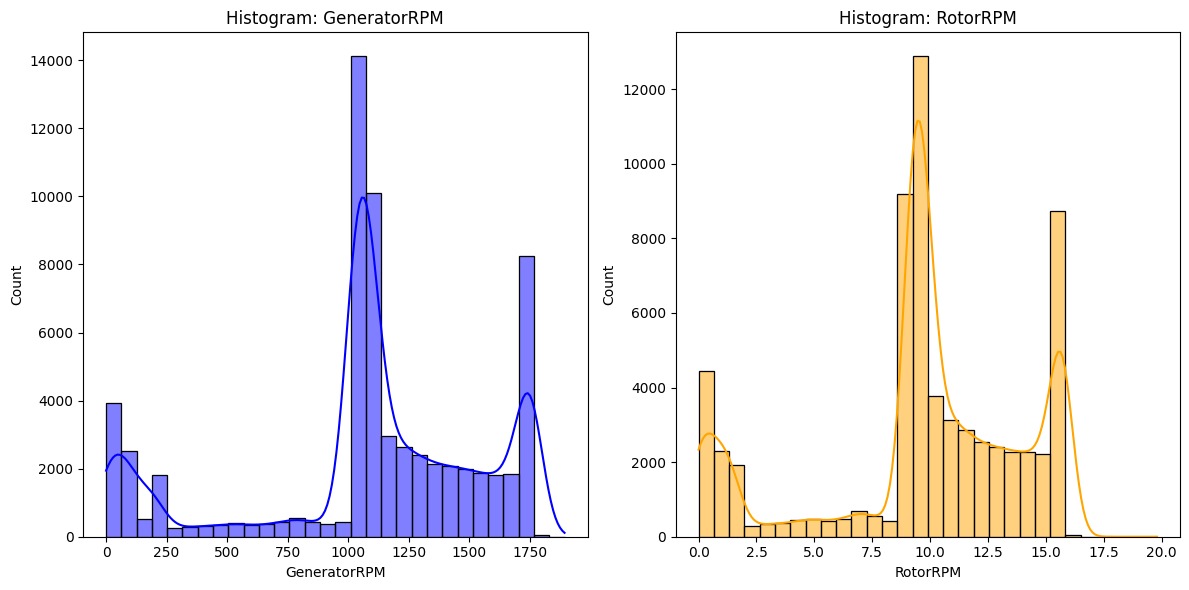

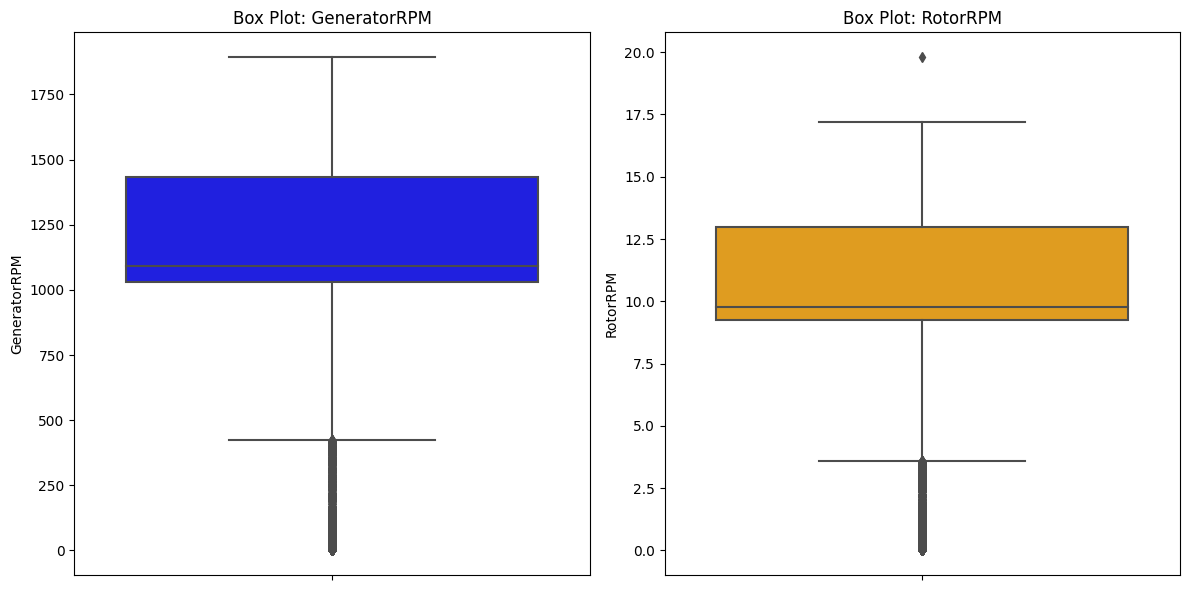

In [ ]:
# Scatter plot to compare GeneratorRPM and RotorRPM
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GeneratorRPM', y='RotorRPM', data=data)
plt.title('Scatter Plot: GeneratorRPM vs RotorRPM')
plt.xlabel('GeneratorRPM')
plt.ylabel('RotorRPM')
plt.grid(True)
plt.show()

# Histograms for GeneratorRPM and RotorRPM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['GeneratorRPM'], bins=30, kde=True, color='blue')
plt.title('Histogram: GeneratorRPM')

plt.subplot(1, 2, 2)
sns.histplot(data['RotorRPM'], bins=30, kde=True, color='orange')
plt.title('Histogram: RotorRPM')

plt.tight_layout()
plt.show()

# Box plots for GeneratorRPM and RotorRPM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='GeneratorRPM', data=data, color='blue')
plt.title('Box Plot: GeneratorRPM')

plt.subplot(1, 2, 2)
sns.boxplot(y='RotorRPM', data=data, color='orange')
plt.title('Box Plot: RotorRPM')

plt.tight_layout()
plt.show()

<Axes: ylabel='RotorRPM'>

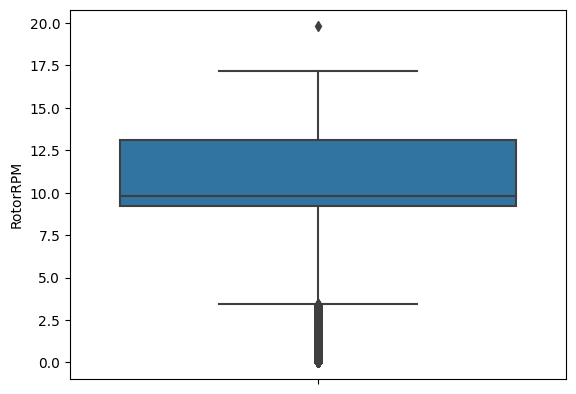

In [ ]:
sns.boxplot(y=df_2019['RotorRPM'])

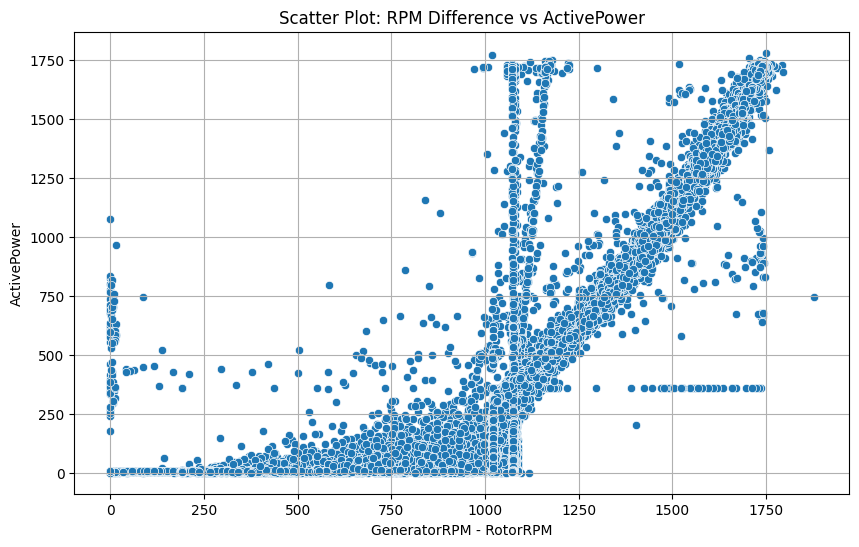

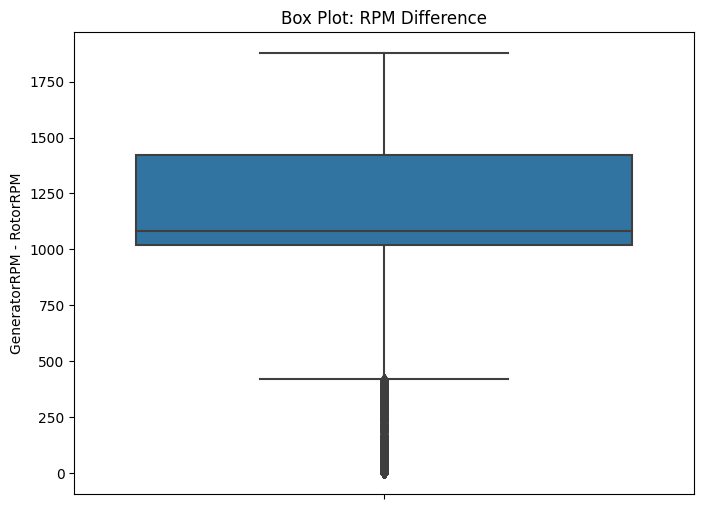

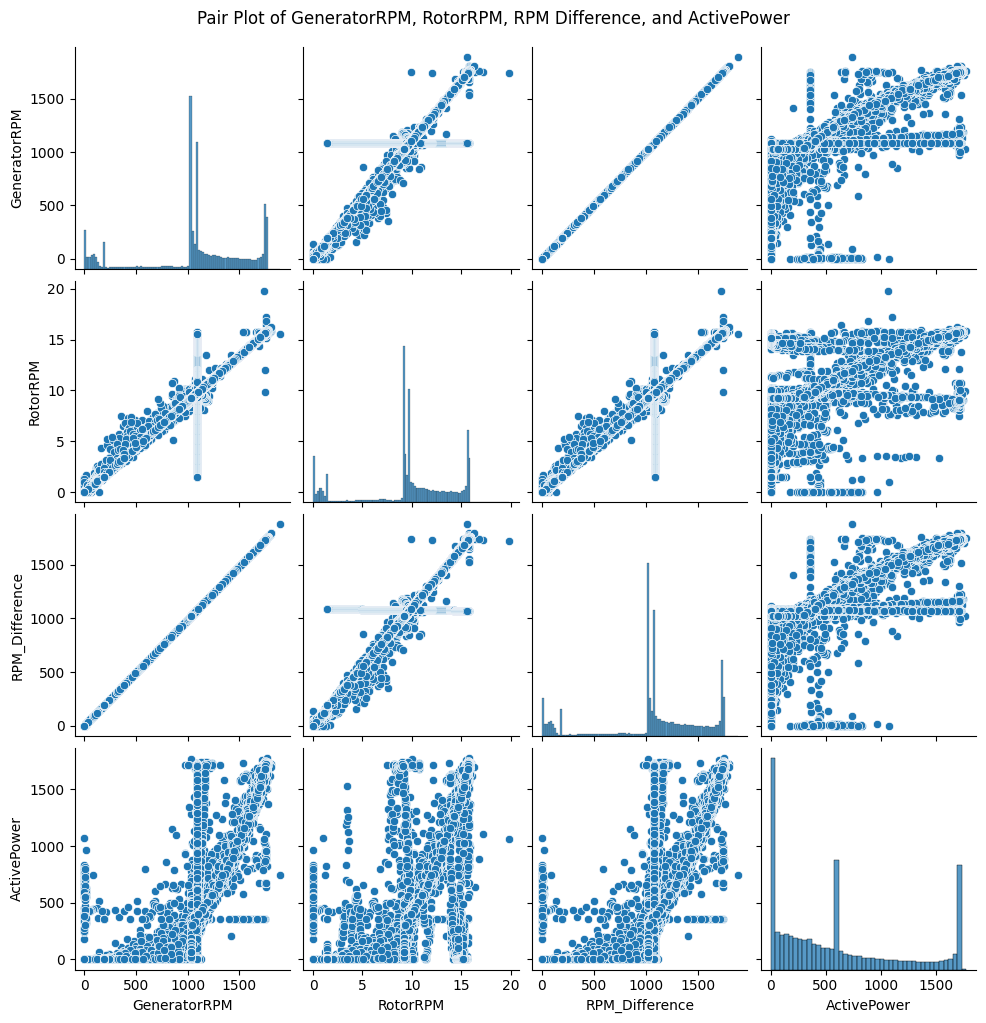

In [ ]:
data['RPM_Difference'] = data['GeneratorRPM'] - data['RotorRPM']

# Scatter plot of RPM difference vs ActivePower
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RPM_Difference', y='ActivePower', data=data)
plt.title('Scatter Plot: RPM Difference vs ActivePower')
plt.xlabel('GeneratorRPM - RotorRPM')
plt.ylabel('ActivePower')
plt.grid(True)
plt.show()

# Box plot of RPM difference
plt.figure(figsize=(8, 6))
sns.boxplot(y='RPM_Difference', data=data)
plt.title('Box Plot: RPM Difference')
plt.ylabel('GeneratorRPM - RotorRPM')
plt.show()

# Pair plot to visualize relationships between numerical variables
numerical_columns = ['GeneratorRPM', 'RotorRPM', 'RPM_Difference', 'ActivePower']
sns.pairplot(data[numerical_columns])
plt.suptitle('Pair Plot of GeneratorRPM, RotorRPM, RPM Difference, and ActivePower', y=1.02)
plt.show()

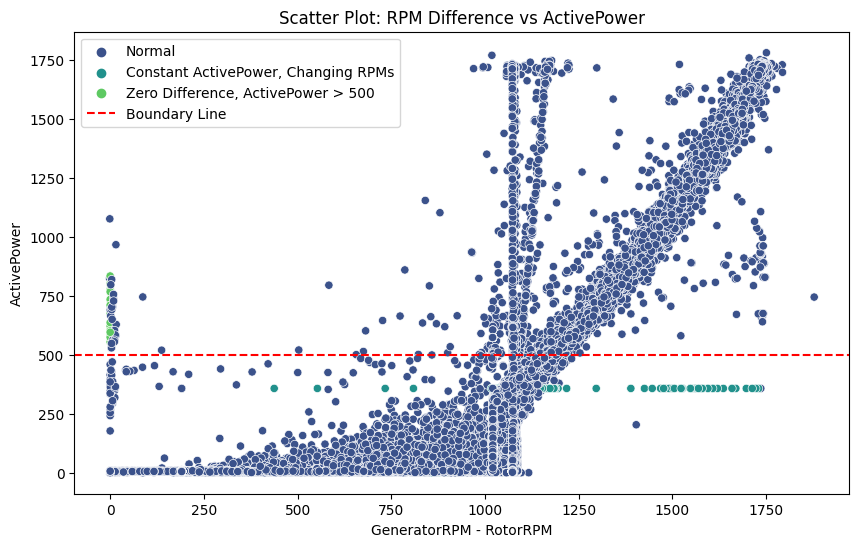

In [ ]:
# Calculate the difference between GeneratorRPM and RotorRPM
data['RPM_Difference'] = data['GeneratorRPM'] - data['RotorRPM']

data['Unusual'] = 'Normal'  # Default label

condition_1 = (data['RPM_Difference'] == 0) & (data['ActivePower'] > 500)
data.loc[condition_1, 'Unusual'] = 'Zero Difference, ActivePower > 500'

# Identify points where ActivePower is constant while GeneratorRPM and RotorRPM are changing
condition_2 = (data['ActivePower'].diff() == 0) & (data['GeneratorRPM'].diff() != 0) & (data['RotorRPM'].diff() != 0)
data.loc[condition_2, 'Unusual'] = 'Constant ActivePower, Changing RPMs'

# Scatter plot with different colors for unusual points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RPM_Difference', y='ActivePower', hue='Unusual', data=data, palette='viridis')

# Add a horizontal line at y=500
plt.axhline(y=500, color='red', linestyle='--', label='Boundary Line')

# Set plot title and labels
plt.title('Scatter Plot: RPM Difference vs ActivePower')
plt.xlabel('GeneratorRPM - RotorRPM')
plt.ylabel('ActivePower')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
data.rename(columns={'AmbientTemperatue': 'AmbientTemperature'}, inplace=True)

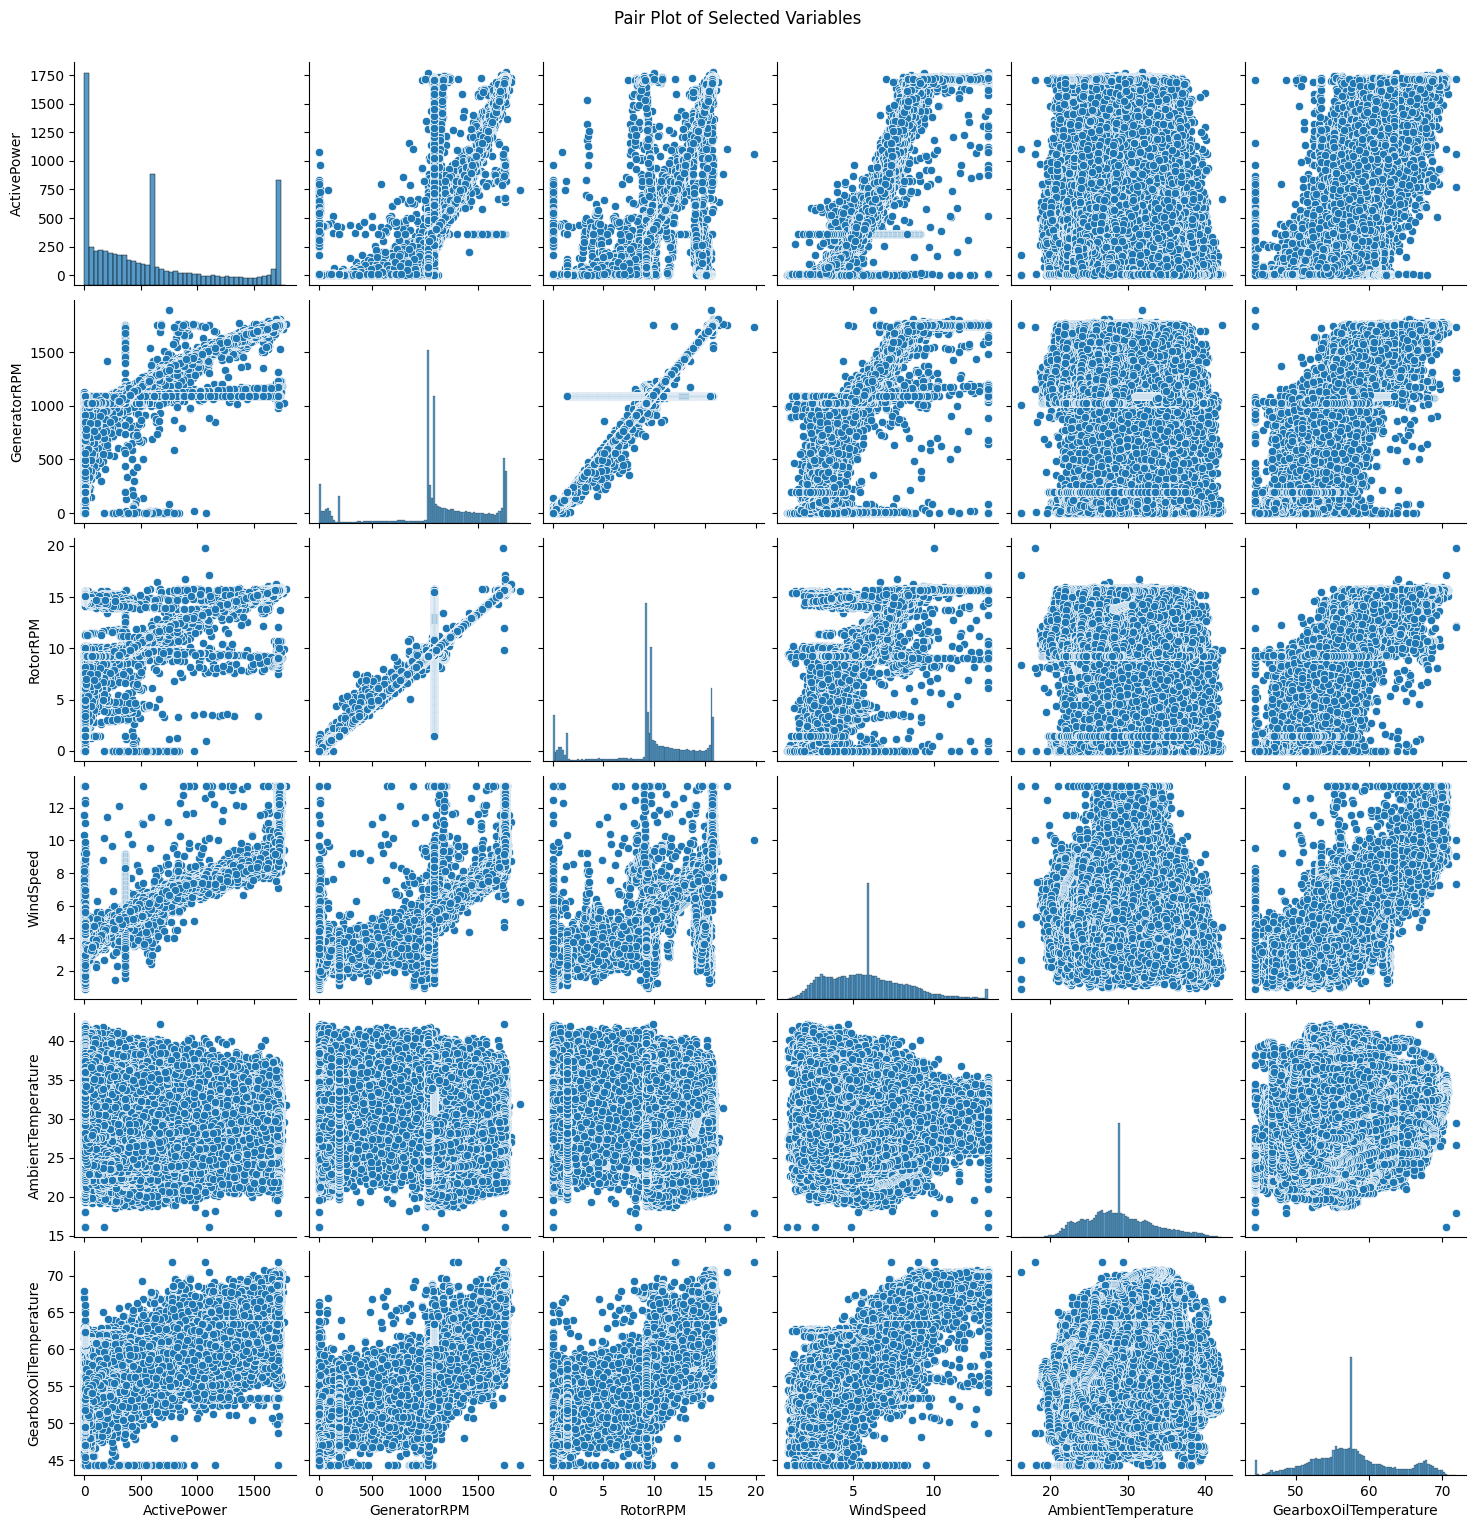

In [ ]:
numerical_columns = ['ActivePower', 'GeneratorRPM', 'RotorRPM', 'WindSpeed', 'AmbientTemperature', 'GearboxOilTemperature']

# Create pair plots for selected variables
sns.pairplot(data[numerical_columns])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()


In [ ]:
data.columns

Index(['ActivePower', 'AmbientTemperature', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle',
       'ControlBoxTemperature', 'GearboxBearingTemperature',
       'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature',
       'GeneratorWinding2Temperature', 'HubTemperature', 'MainBoxTemperature',
       'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus',
       'WindDirection', 'WindSpeed', 'Date and Time', 'WTG', 'Time', 'Date',
       'RPM_Difference', 'Unusual'],
      dtype='object')

Do increased temperatures in BearingShaft and GearboxOil coincide with periods of high winds, indicating potential blade surface irregularities?

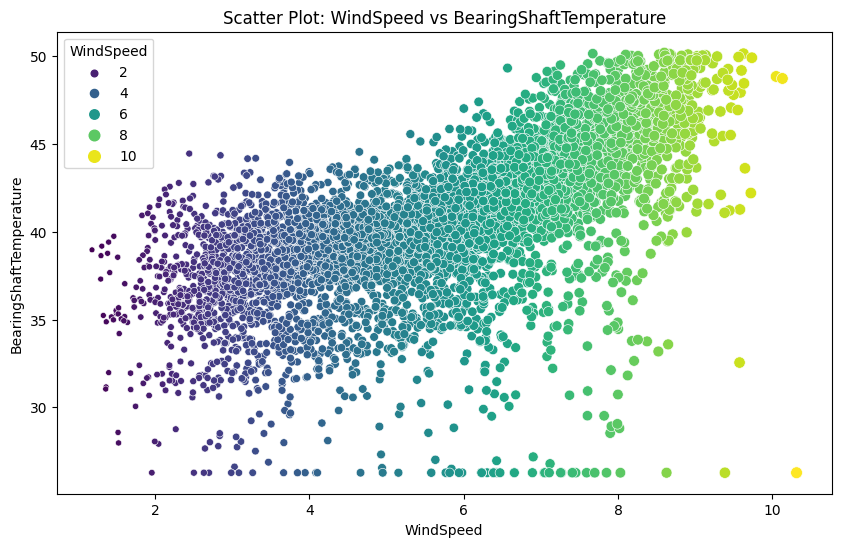

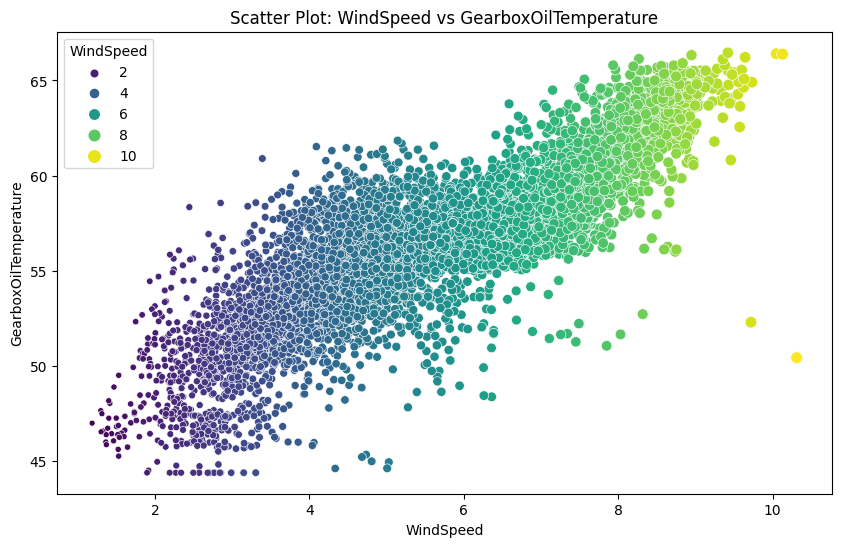

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WindSpeed', y='BearingShaftTemperature', data=data[:7000], hue='WindSpeed', palette='viridis', size='WindSpeed')
plt.title('Scatter Plot: WindSpeed vs BearingShaftTemperature')
plt.xlabel('WindSpeed')
plt.ylabel('BearingShaftTemperature')
plt.legend(title='WindSpeed')
plt.show()



# Scatter plot of WindSpeed vs GearboxOilTemperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WindSpeed', y='GearboxOilTemperature', data=data[:7000], hue='WindSpeed', palette='viridis', size='WindSpeed')
plt.title('Scatter Plot: WindSpeed vs GearboxOilTemperature')
plt.xlabel('WindSpeed')
plt.ylabel('GearboxOilTemperature')
plt.legend(title='WindSpeed')
plt.show()


In [ ]:
data['WindSpeed'].value_counts(bins=5)

(3.39, 5.88]      26993
(5.88, 8.37]      17496
(0.887, 3.39]     11205
(8.37, 10.86]      7561
(10.86, 13.35]     2265
Name: WindSpeed, dtype: int64

In [ ]:
x = data[(data['WindSpeed'] >= 10) & (data['WindSpeed'] < 14)][['Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle']].mean()

In [ ]:
y = data[(data['WindSpeed'] >= 3.39) & (data['WindSpeed'] < 5.88)][['Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle']].mean()

In [ ]:
z = data[(data['WindSpeed'] >= 8.37) & (data['WindSpeed'] < 10.86)][['Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle']].mean()

In [ ]:
stats_data = pd.DataFrame({'High Wind Speed': z, 'Avg Wind Speed': x,'Low Wind Speed':y ,'Blades': ['Blade1', 'Blade2', 'Blade3']})

In [ ]:
stats_data

High Wind Speed  Avg Wind Speed  Low Wind Speed  Blades
Blade1PitchAngle         4.654154        9.884736        7.088356  Blade1
Blade2PitchAngle         5.156401       10.232248        7.577602  Blade2
Blade3PitchAngle         5.156401       10.232248        7.577602  Blade3

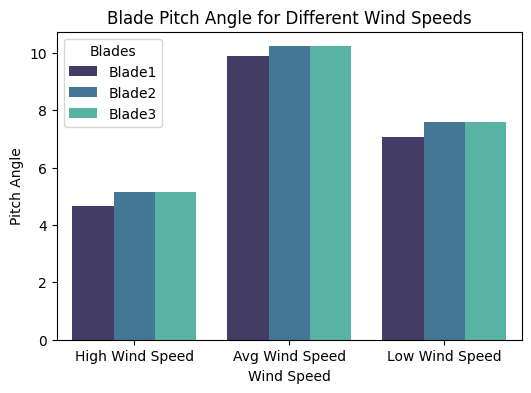

In [ ]:
melted_data = stats_data.melt(id_vars='Blades', var_name='WindSpeed', value_name='PitchAngle')
plt.figure(figsize=(6, 4))
sns.barplot(x='WindSpeed', y='PitchAngle', hue='Blades', data=melted_data, palette='mako')
plt.title('Blade Pitch Angle for Different Wind Speeds')
plt.xlabel('Wind Speed')
plt.ylabel('Pitch Angle')
plt.show()

In [ ]:
data['AmbientTemperature'].value_counts(bins=3)

(24.857, 33.527]    43700
(16.159, 24.857]    12265
(33.527, 42.197]     9555
Name: AmbientTemperature, dtype: int64

In [ ]:
x = data[(data['AmbientTemperature'] >= 16.159) & (data['AmbientTemperature'] < 24.857)][['Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle']].mean()

In [ ]:
y = data[(data['AmbientTemperature'] >= 24.857) & (data['AmbientTemperature'] < 33.527)][['Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle']].mean()

In [ ]:
z = data[(data['AmbientTemperature'] >= 33.527) & (data['AmbientTemperature'] < 42.197)][['Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle']].mean()

In [ ]:
stats_data = pd.DataFrame({'High Temperature': z, 'Avg Temperature': y,'Low Temperature':x ,'Blades': ['Blade1', 'Blade2', 'Blade3']})

In [ ]:
stats_data

High Temperature  Avg Temperature  Low Temperature  Blades
Blade1PitchAngle         12.104187         9.175022         9.617442  Blade1
Blade2PitchAngle         12.047354         9.599414         9.961568  Blade2
Blade3PitchAngle         12.047354         9.599414         9.961568  Blade3

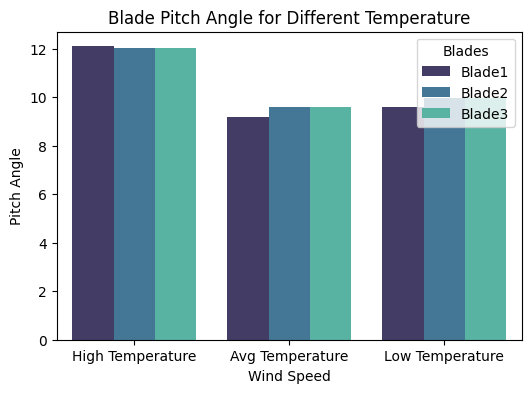

In [ ]:
melted_data = stats_data.melt(id_vars='Blades', var_name='Temperature', value_name='PitchAngle')
plt.figure(figsize=(6, 4))
sns.barplot(x='Temperature', y='PitchAngle', hue='Blades', data=melted_data, palette='mako')
plt.title('Blade Pitch Angle for Different Temperature')
plt.xlabel('Wind Speed')
plt.ylabel('Pitch Angle')
plt.show()